## Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# load train dataset
train_ds = pd.read_csv('titanic_train.csv')
train_ds.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,28.500000,7.2292,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,27.000000,10.5000,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,29.699118,16.1000,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,29.699118,0.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,17.000000,8.6625,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [26]:
# describe data
train_ds.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.00000,712.00000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.393258,29.674341,32.777006,0.238764,0.209270,0.551966,0.36236,0.63764,0.688202,0.230337,...,0.751404,0.140449,0.087079,0.007022,0.005618,0.007022,0.001404,0.179775,0.082865,0.737360
std,0.488817,12.986095,51.481840,0.426628,0.407073,0.497642,0.48102,0.48102,0.463553,0.421345,...,0.432503,0.347697,0.282148,0.083564,0.074795,0.083564,0.037477,0.384270,0.275872,0.440378
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.925000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.456250,0.000000,0.000000,1.000000,0.00000,1.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.275000,0.000000,0.000000,1.000000,1.00000,1.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_ds.corr()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.046308,0.230529,0.264012,0.101815,-0.309622,0.529612,-0.529612,-0.078808,0.146858,...,-0.129017,0.146259,0.036895,0.035593,-0.060513,-0.033272,-0.030193,0.154717,0.029180,-0.153285
Age,-0.046308,1.000000,0.110536,0.343617,0.031195,-0.320100,-0.093782,0.093782,0.139889,0.029764,...,0.241332,-0.166999,-0.217069,0.022848,0.085872,0.061730,0.038511,0.015299,-0.006800,-0.009090
Fare,0.230529,0.110536,1.000000,0.580113,-0.120511,-0.398752,0.164505,-0.164505,-0.168262,0.115299,...,-0.216268,0.109164,0.178822,-0.011157,0.076255,-0.000371,0.010295,0.251193,-0.111409,-0.149398
Pclass_1,0.264012,0.343617,0.580113,1.000000,-0.288114,-0.621621,0.071270,-0.071270,-0.042631,0.108309,...,0.009614,0.020135,-0.009387,-0.047098,0.001981,-0.047098,-0.021003,0.252555,-0.144442,-0.129892
Pclass_2,0.101815,0.031195,-0.120511,-0.288114,1.000000,-0.571005,0.079072,-0.079072,-0.011494,0.071175,...,-0.023640,0.040474,0.000310,0.039430,-0.038668,-0.043263,-0.019293,-0.132950,-0.117063,0.189344
Pclass_3,-0.309622,-0.320100,-0.398752,-0.621621,-0.571005,1.000000,-0.125780,0.125780,0.045950,-0.151075,...,0.011096,-0.050370,0.007794,0.008123,0.029932,0.075766,0.033788,-0.107762,0.219588,-0.043528
Sex_female,0.529612,-0.093782,0.164505,0.071270,0.079072,-0.125780,1.000000,-1.000000,-0.205353,0.170525,...,-0.276250,0.149385,0.181704,0.076566,0.021523,0.076566,0.049749,0.035138,0.091371,-0.087900
Sex_male,-0.529612,0.093782,-0.164505,-0.071270,-0.079072,0.125780,-1.000000,1.000000,0.205353,-0.170525,...,0.276250,-0.149385,-0.181704,-0.076566,-0.021523,-0.076566,-0.049749,-0.035138,-0.091371,0.087900
SibSp_0,-0.078808,0.139889,-0.168262,-0.042631,-0.011494,0.045950,-0.205353,0.205353,1.000000,-0.812743,...,0.440639,-0.303851,-0.233014,-0.088630,-0.071104,-0.052321,-0.055717,-0.048084,0.059347,0.004780
SibSp_1,0.146858,0.029764,0.115299,0.108309,0.071175,-0.151075,0.170525,-0.170525,-0.812743,1.000000,...,-0.241035,0.239688,-0.003323,0.073833,0.092769,0.073833,0.068554,0.100044,-0.067638,-0.044926


In [27]:
# fare has zero values
len(train_ds.loc[train_ds.Fare==0]==True)

9

In [28]:
# fill the 0 with mean
train_ds['Fare'] = train_ds.Fare.map(lambda f: train_ds.Fare.mean() if f==0 else f)

In [29]:
train_ds.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,28.500000,7.229200,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,27.000000,10.500000,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,29.699118,16.100000,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,29.699118,32.777006,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,17.000000,8.662500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [35]:
len(train_ds.loc[train_ds.Fare==0]==True)

0

In [33]:
# classify dependent and independent variables
x_train = train_ds.drop('Survived',axis=1)
y_train = train_ds.Survived

In [34]:
x_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,28.500000,7.229200,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,27.000000,10.500000,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,29.699118,16.100000,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,29.699118,32.777006,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,17.000000,8.662500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


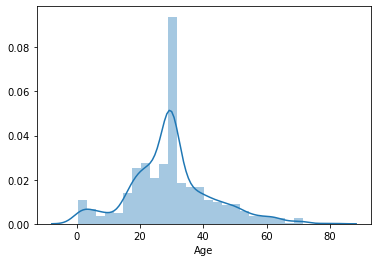

In [42]:
# visualization
sns.distplot(train_ds.Age);

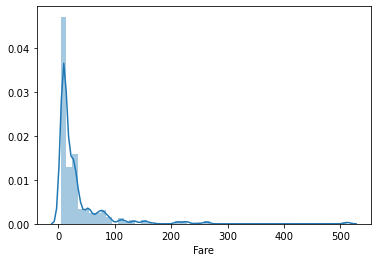

In [44]:
sns.distplot(train_ds.Fare);

In [45]:
# train model
from sklearn.naive_bayes import GaussianNB

In [47]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [48]:
# Prediction on train set
train_prediction = model.predict(x_train)

In [54]:
# calculate the performance
from sklearn.metrics import accuracy_score
print("Training Accuracy = %.3f"%(accuracy_score(y_train,train_prediction)))

Training Accuracy = 0.448


In [59]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,train_prediction,labels=[1,0]))

[[276   4]
 [389  43]]


In [69]:
# draw confusion matrix 
def draw_confusion_mat(yTrue,yPred):
    cf_mat = confusion_matrix(yTrue,yPred,labels=[1,0])
    fig,ax = plt.subplots(figsize=(4,4))
    ax.imshow(cf_mat)
    ax.xaxis.set(ticks=(1,0),ticklabels=('Predicted 1s','Predicted 0s'))
    ax.yaxis.set(ticks=(1,0),ticklabels=('Actual 1s','Actual 0s'))
    for i in range(2):
        for j in range(2):
            ax.text(j,i,cf_mat[i,j],ha='center',va='center',color='black',fontsize='12')
            
    plt.show()

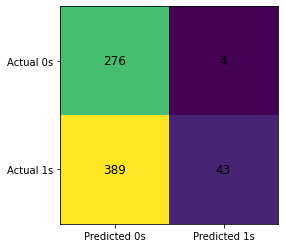

In [70]:
draw_confusion_mat(y_train,train_prediction)

In [55]:
# visualize using ROC curve
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [76]:
# calculate baseline i.e no skill and majority propability to compare the roc i.e tpr vs fpr
ns_probs = [0 for _ in range(len(y_train))]

# get the predicted propabilties
lr_probs = model.predict_proba(x_train)

# only retrieve the 1's to draw the roc
lr_probs = lr_probs[:,1]

# calculate the roc_auc scores
ns_auc = roc_auc_score(y_train,ns_probs)
lr_auc = roc_auc_score(y_train,lr_probs)

print('No Skill AUC score %.3f'%(ns_auc))
print('Majority Preicted Skill %.3f'%(lr_auc))

No Skill AUC score 0.500
Majority Preicted Skill 0.828


In [81]:
# get the TPR , FPR and Thresholds
ns_fpr, ns_tpr, ns_thres = roc_curve(y_train,ns_probs)
lr_fpr, lr_tpr, lr_thres = roc_curve(y_train,lr_probs)
print('No Skill Thresholds',ns_thres)
print('Skill Thresholds',lr_thres[:4])

No Skill Thresholds [1 0]
Skill Thresholds [2. 1. 1. 1.]


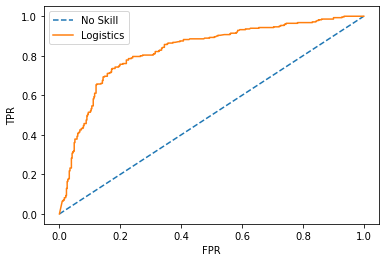

In [82]:
# plot the roc curve
plt.plot(ns_fpr,ns_tpr,linestyle = '--',label = 'No Skill');
plt.plot(lr_fpr,lr_tpr,linestyle = '-',label = 'Logistics');
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [83]:
# get the test set
test_df = pd.read_csv('titanic_test.csv');
test_df.head()


,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,35.0,7.1250,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,20.0,7.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,26.0,7.8958,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,58.0,146.5208,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,83.4750,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [86]:
# see for zeros in the Age & Fare feature
print('Zeros in Fare',len(test_df.loc[test_df.Fare==0]==True))
print('Zeros in Age',len(test_df.loc[test_df.Age==0]==True))

Zeros in Fare 6
Zeros in Age 0


In [87]:
# repalce zeros in fare with it's mean
test_df['Fare'] = test_df.Fare.map(lambda f: test_df.Fare.mean() if f == 0 else f)

In [88]:
print('Zeros in Fare',len(test_df.loc[test_df.Fare==0]==True))

Zeros in Fare 0
